In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import logging
logging.getLogger('matplotlib.font_manager').disabled = True

credit = pd.read_csv('credit_card.csv')

In [9]:
print("data null \n", credit.isnull().sum()) 
print("data kosong \n", credit.empty) 
print("data nan \n", credit.isna().sum())

data null 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
data kosong 
 False
data nan 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [10]:
df_credit = credit.drop(['Customer Key', 'Sl_No'], axis=1)
df_credit.head() 

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


<Axes: >

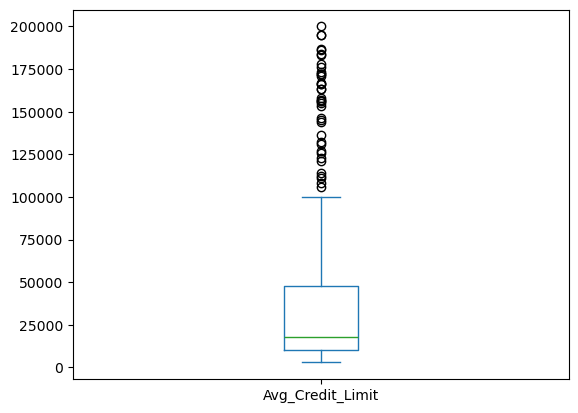

In [11]:
df_credit['Avg_Credit_Limit'].plot(kind='box')

Jumlah data sebelum dibuang outlier: 660
Jumlah data sesudah dibuang outlier: 621


<Axes: >

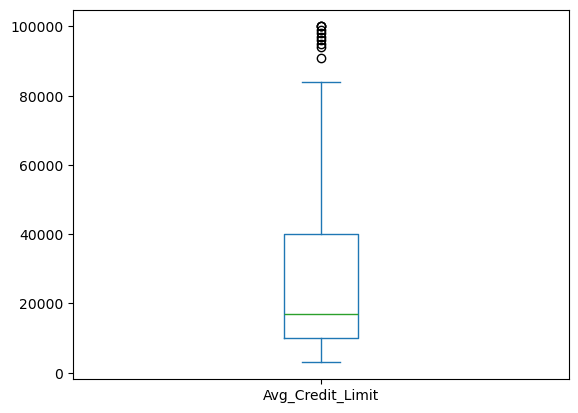

In [12]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(data_frame, kolom_outlier):
    q1 = data_frame[kolom_outlier].quantile(0.25)
    q3 = data_frame[kolom_outlier].quantile(0.75)
    iqr = q3 - q1
    batas_bawah = q1 - 1.5 * iqr
    batas_atas = q3 + 1.5 * iqr 
    
    data_frame_bersih = data_frame[(data_frame[kolom_outlier] >= batas_bawah) & 
                                   (data_frame[kolom_outlier] <= batas_atas)]
    return data_frame_bersih

data_bersih = remove_outlier(df_credit, 'Avg_Credit_Limit') 

print("Jumlah data sebelum dibuang outlier:", df_credit.shape[0])
print("Jumlah data sesudah dibuang outlier:", data_bersih.shape[0])

data_bersih['Avg_Credit_Limit'].plot(kind='box')

  File "c:\Users\YAWE MANOLO\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\YAWE MANOLO\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\YAWE MANOLO\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\YAWE MANOLO\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


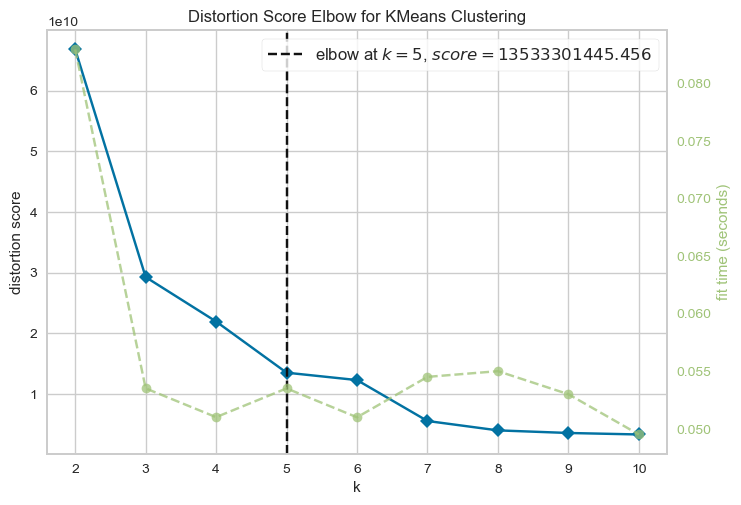

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
import warnings
warnings.filterwarnings('ignore')

from yellowbrick.cluster import KElbowVisualizer

kMeansC = KMeans(random_state=47)

vis = KElbowVisualizer(kMeansC, k=(2,11))

vis.fit(data_bersih)

vis.show()

Silhouette Score K-Means for  2  clusters : 0.7254150167909509
Silhouette Score K-Means for  3  clusters : 0.7058100919802311
Silhouette Score K-Means for  4  clusters : 0.5928895843252326
Silhouette Score K-Means for  5  clusters : 0.6031361650478383
Silhouette Score K-Means for  6  clusters : 0.5678704068300559
Silhouette Score K-Means for  7  clusters : 0.5946943883687696
Silhouette Score K-Means for  8  clusters : 0.5897779186496597
Silhouette Score K-Means for  9  clusters : 0.5777858869826088
Silhouette Score K-Means for  10  clusters : 0.579553274847373


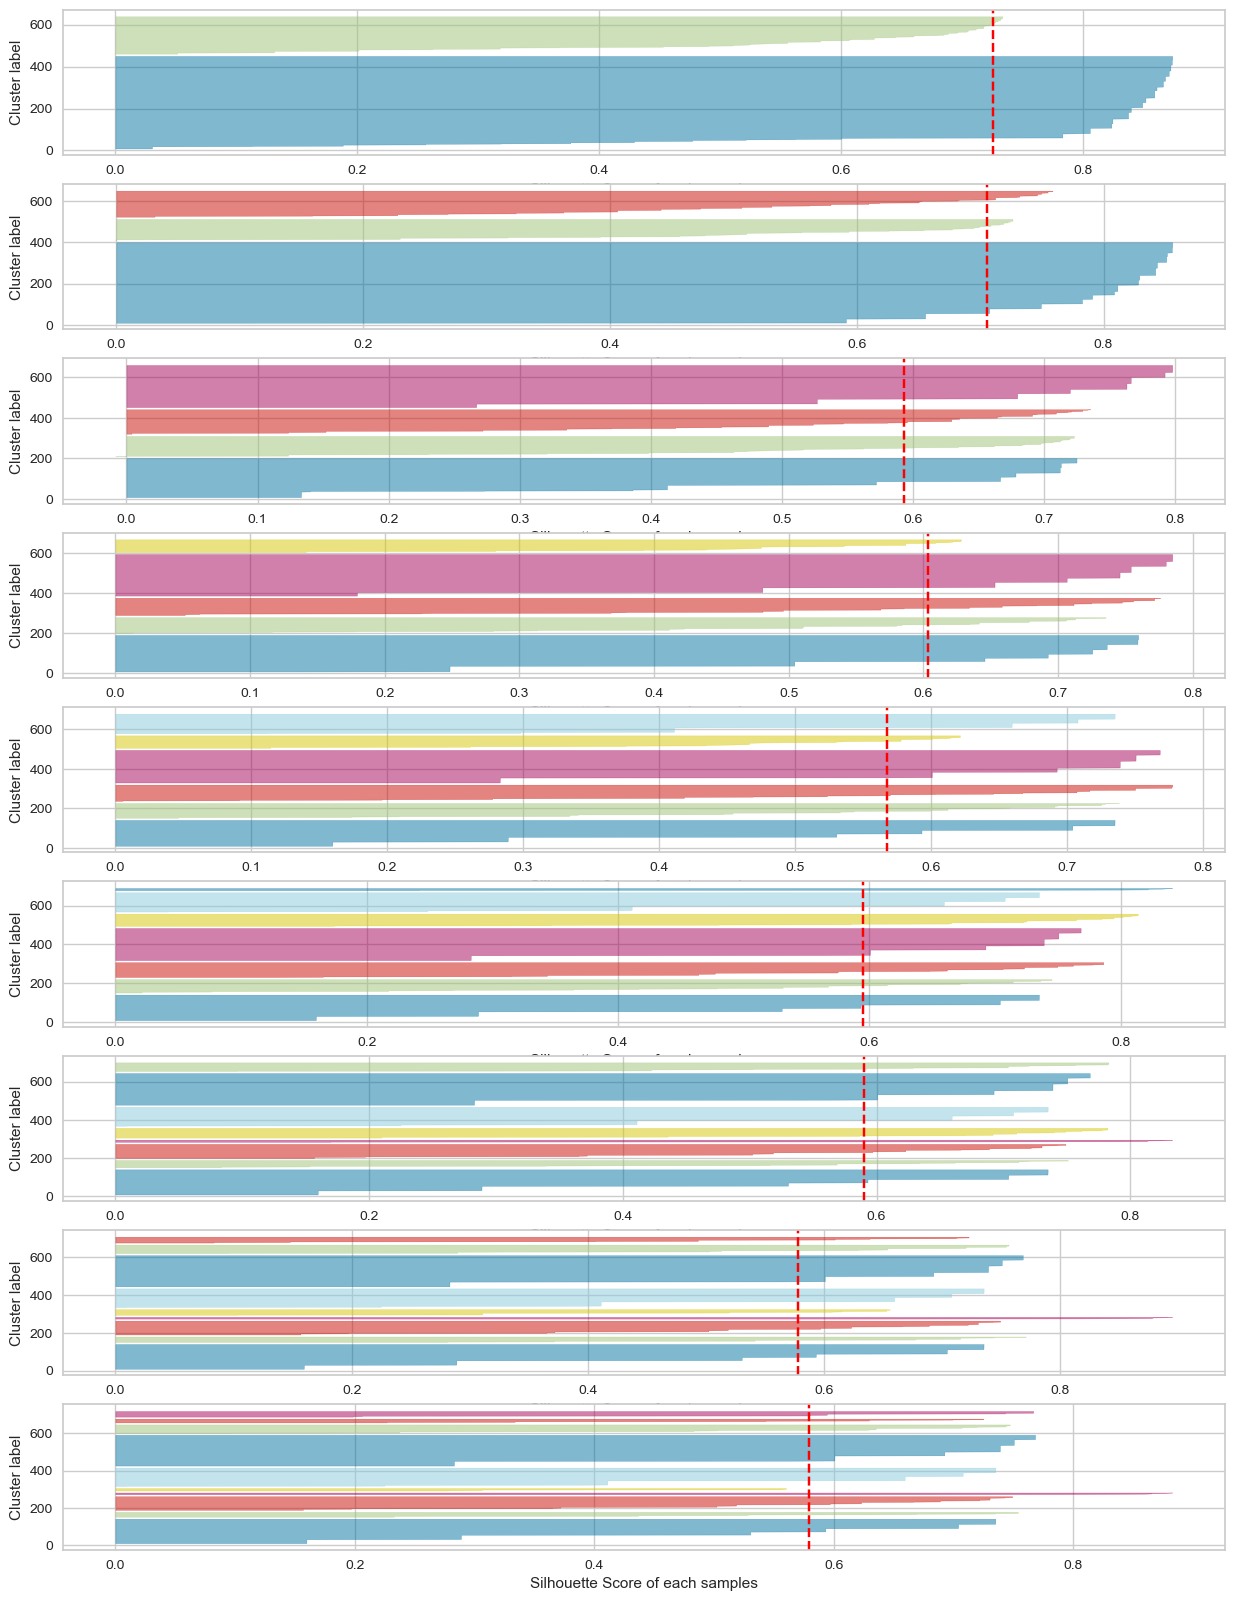

In [14]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(9,1, figsize=(15,20)) 

for k in np.arange(2,11):
    kMeansC = KMeans(n_clusters=k, init='k-means++', random_state=47)
    
    KM_clusters=kMeansC.fit_predict(data_bersih)
    print("Silhouette Score K-Means for ", k, " clusters :", silhouette_score(data_bersih, KM_clusters))  

    sil_vis = SilhouetteVisualizer(kMeansC, colors='yellowbrick', ax=ax[k-2])
    
    sil_vis.fit(data_bersih)  

    ax[k-2].set(xlabel="Silhouette Score of each samples", ylabel="Cluster label")

In [15]:
data_bersih.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

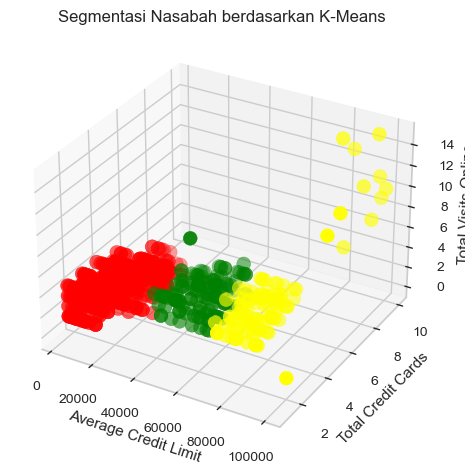

Silhouette Score K-Means: 0.706


In [16]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state = 47)

K_clusters = kmeans.fit_predict(data_bersih)

fig = plt.figure()
ax = plt.axes(projection='3d')

cluster_colors = {0: 'red', 1: 'yellow', 2: 'green', 3: 'blue', 4: 'magenta', 5: 'black', 6:'cyan'}

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],  # Ganti xx dengan data_bersih
           c=[cluster_colors[i] for i in K_clusters], s=100)

plt.title('Segmentasi Nasabah berdasarkan K-Means')
ax.set_xlabel('Average Credit Limit') 
ax.set_ylabel('Total Credit Cards') 
ax.set_zlabel('Total Visits Online')
plt.show()  

print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, K_clusters)) 

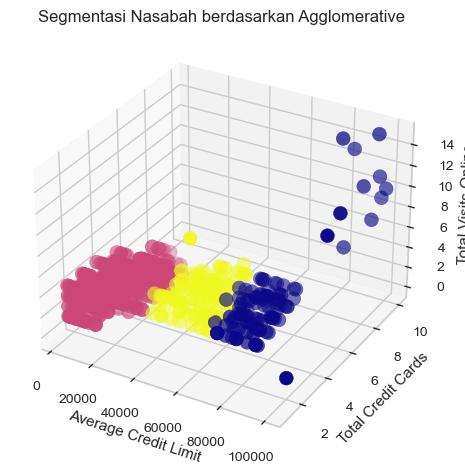

Silhouette Score K-Means: 0.705


In [17]:
import seaborn as sns

from matplotlib.colors import ListedColormap 

AGG = AgglomerativeClustering(n_clusters=3, linkage='ward')

AGG_clusters = AGG.fit_predict(data_bersih)

cmap = ListedColormap(sns.color_palette("plasma", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],  # Ganti xx dengan data_bersih
           c=AGG_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan Agglomerative')
ax.set_xlabel('Average Credit Limit') #Label sumbu x
ax.set_ylabel('Total Credit Cards') #Label sumbu y
ax.set_zlabel('Total Visits Online') #Label sumbu z
plt.show() #menampilkan plot

print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, AGG_clusters)) 

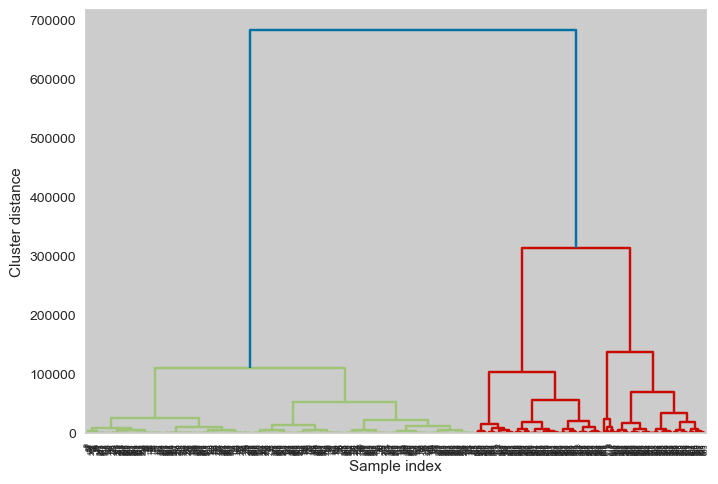

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_array = linkage(data_bersih, method='ward')  

dendrogram(linkage_array)

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

plt.show()

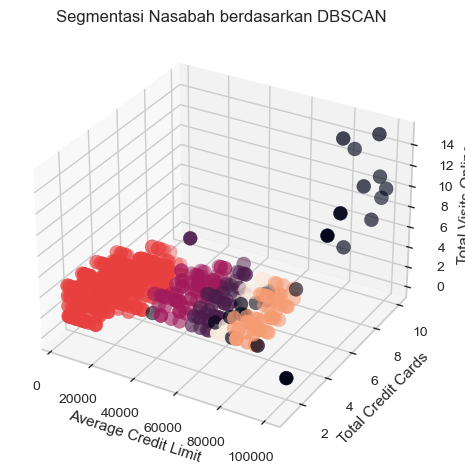

Silhouette Score K-Means: 0.657


In [19]:
DBSC = DBSCAN(min_samples=20,eps=2500)

DBSC_clusters = DBSC.fit_predict(data_bersih) 

from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex()) 

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'], 
           c=DBSC_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan DBSCAN')
ax.set_xlabel('Average Credit Limit') #label sumbu x
ax.set_ylabel('Total Credit Cards') #label sumbu y
ax.set_zlabel('Total Visits Online') #label sumbu z

plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, DBSC_clusters))

In [20]:
import pickle

with open('KMeans_model.pkl', 'wb') as r:
    pickle.dump(kmeans, r)

with open('AGG_model.pkl', 'wb') as r:
    pickle.dump(AGG, r)

with open('DBSCAN_model.pkl', 'wb') as r:
    pickle.dump(DBSC, r)

print("Model berhasil disimpan")

Model berhasil disimpan
